# Install Packages

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


2023-03-05 13:47:47.807919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exercise 1: Identifying Handwritten Numbers

We will begin using a very simple image recognition example: classifying hand-written numbers. This is a very useful ability for computers as it allows mail carriers to read hand-written postal codes and house numbers, and thereby sort mail automatically. It also allows banks to read numbers from cheques.

#### Question 1: Give a list of applications where automatic recognition of hand-written numbers would be useful (3 points)

1) Digit recognition in scientific experiments
2) Scanning and digit recognition in medical forms
3) Recognition of numbers written on receipts or invoices for financial tracking
4) Handwritten number recognition in logistics and supply chain management
5) Digit recognition in retail point of sale systems

First, download MNIST and store both train and test tuples:

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

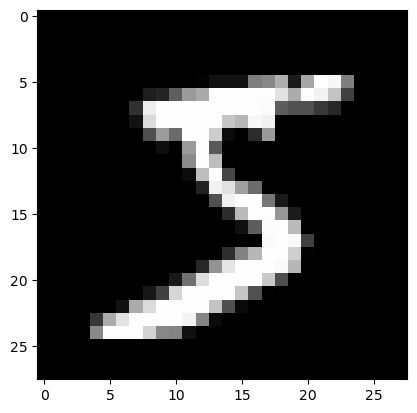

In [14]:
# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [15]:
print(y_train[0])

5


In [20]:
print(y_train)

[5 0 4 ... 5 6 8]


### Data preparation

In [3]:
# Flatten the images from 28x28 to 784 pixels
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

# Normalize the pixel values from [0, 255] to [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# Convert the labels to one-hot encoded form
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [12]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Model definition

For our multi-layer perceptron (MLP), we will pass our 784 input units (flattened pixels) into a 256-unit fully connected hidden layer. This in turn feeds into our label (output) layer whose activation follows a softmax function to give the probability that each image is each digit. We initialise this model using the function keras.Sequential(). The fully-connected layers are defined by the Keras function keras.layers.Dense().

In [4]:
# Create a new sequential model object. 
# A sequential model is a linear stack of layers, where you can easily add, remove, and connect layers.
model = keras.Sequential()

# Add a new fully connected layer with 256 units to the model. 
# The input_shape parameter tells Keras the shape of the input data, which is a 1D array of length 784
model.add(keras.layers.Dense(256, input_shape=(784,)))

# Add another dense layer with 10 units to the model. 
# The activation parameter specifies the activation function to use for the layer's output. 
# In this case, the softmax function is used, which produces a probability distribution over the 10 output classes.
model.add(keras.layers.Dense(10, activation='softmax'))

2023-03-05 13:48:31.475431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


To check the resulting model is what you expect, use:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Compile the model with suitable loss functions, optimisation procedures, and performance measures, as follows:

In [34]:
# When you compile a model in Keras, you specify the optimizer, loss function, and metrics that you want to use during the training phase.
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

### Training and evaluation

Now we will fit the model to our training set, keeping a history of the performance at each stage. We will use 12 training epochs. We will set aside a random 20% of our data to check performance at each training epoch (which don’t change between epochs). In each training epoch, we will use 128 image-label pairs per batch to improve computational efficiency. We will use the verbose argument to tell us what is happening in each epoch.

In [35]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8865 - val_loss: 0.2999 - val_accuracy: 0.9143
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.3068 - accuracy: 0.9135 - val_loss: 0.3232 - val_accuracy: 0.9108
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.9172 - val_loss: 0.2815 - val_accuracy: 0.9236
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2863 - accuracy: 0.9195 - val_loss: 0.2830 - val_accuracy: 0.9235
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.9215 - val_loss: 0.2740 - val_accuracy: 0.9245
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.9222 - val_loss: 0.2864 - val_accuracy: 0.9213
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.9233 - val_loss: 0.2767 - val_accuracy: 0.9245
Epoch 

In [10]:
print(y_train.shape)

(60000, 10)


In [19]:
# Print the values of the 'loss' and 'accuracy' keys in the history.history dictionary
print("Training loss: ", history.history['loss'])
print("Training accuracy: ", history.history['accuracy'])

Training loss:  [0.3995487093925476, 0.3089773654937744, 0.2952815294265747, 0.28652137517929077, 0.28172698616981506, 0.2779446244239807, 0.27362319827079773, 0.2717183232307434, 0.2688756585121155, 0.2671584486961365, 0.265948623418808, 0.2635749578475952]
Training accuracy:  [0.8865416646003723, 0.9125416874885559, 0.917354166507721, 0.9191874861717224, 0.9204999804496765, 0.922208309173584, 0.9235000014305115, 0.9234583377838135, 0.9251875281333923, 0.924958348274231, 0.9269999861717224, 0.9262291789054871]


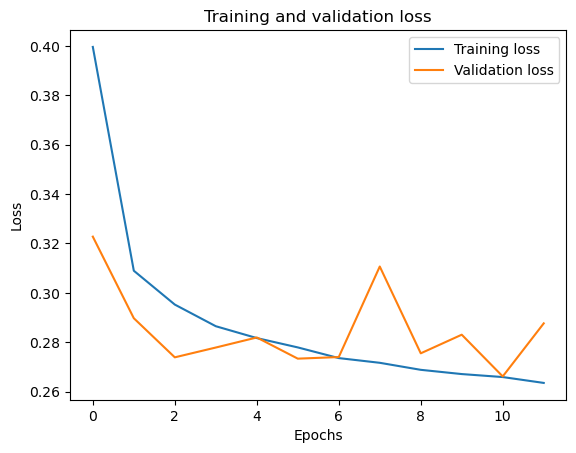

In [20]:
# Plot the training loss
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

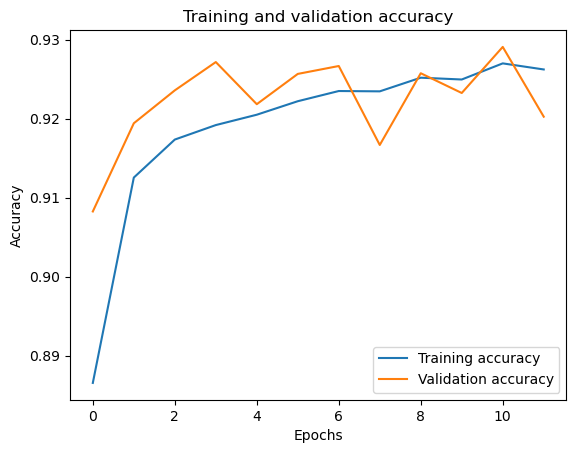

In [21]:
# Plot the training accuracy
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Question 2: Describe how the accuracy and loss evaluated on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model (8 points).

Evaluate the model performance on the test set

In [37]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.28824782371520996
Accuracy: 0.9211000204086304


#### Question 3: Explain whether you think this accuracy is sufficient for some uses of automatic hand-written digit classification, and why (6 points).

An accuracy of 0.92 means that the model is correctly identifying the hand-written digits in 92% of the test set cases. This level of accuracy is generally considered high for a problem of hand-written digit classification and is sufficient for many practical applications.

For example, in certain use-cases like postal code recognition or check deposit, having an accuracy of 92% would be acceptable because even a few misclassified digits can still lead to successful delivery or deposit of the mail/check. However, in other use-cases like in security systems where the identification is critical and errors can cause significant harm, a higher accuracy level would be required.

Therefore, it ultimately depends on the specific requirements of the application and the acceptable error rate, as to whether an accuracy of 92% would be sufficient or not.

### Changing model parameters

#### Question 4: Explain how linear activation of units limits the possible computations this model can perform (4 points).

Linear activation of units in artificial neural netwroks only allows for linear transformations of the input data. In other words, a model with linear activations can only produce an output that is a weighted sum of its inputs, rather than a complex, non-linear mapping of the inputs to the outputs. This limits the possible computations that such a model can perform, as it cannot capture complex non-linear relationships between the inputs and outputs. To overcome this limitation, non-linear activation functions are typically used in deep learning models, allowing them to perform more complex computations and model more intricate relationships between the inputs and outputs.

Now make a similar model with a rectified activation in the first hidden layer, by adding the extra argument:activation = “relu” to the model definition for this layer. Then compile, fit and evaluate the model. 

In [36]:
# Create a new sequential model object. 
# A sequential model is a linear stack of layers, where you can easily add, remove, and connect layers.
model = keras.Sequential()

# Add a new fully connected layer with 256 units to the model. 
# The input_shape parameter tells Keras the shape of the input data, which is a 1D array of length 784.
# There is only one hidden layer in this model, which is created by adding the first layer to the model using model.add(). 
# This layer has 256 units and uses default linear activation function. The input shape of this layer is automatically 
# inferred from the input shape of the model, which is specified in the first layer. Therefore, the first layer specifies 
# both the input layer and the hidden layer of the model.
model.add(keras.layers.Dense(256, input_shape=(784,)))

# Add another dense layer with 10 units to the model. 
# The activation parameter specifies the activation function to use for the layer's output. 
# In this case, the softmax function is used, which produces a probability distribution over the 10 output classes.
model.add(keras.layers.Dense(10, activation='softmax'))


model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9118 - val_loss: 0.1679 - val_accuracy: 0.9527
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1418 - accuracy: 0.9583 - val_loss: 0.1239 - val_accuracy: 0.9639
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0963 - accuracy: 0.9715 - val_loss: 0.1142 - val_accuracy: 0.9663
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9787 - val_loss: 0.0891 - val_accuracy: 0.9749
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.0891 - val_accuracy: 0.9717
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0794 - val_accuracy: 0.9777
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0815 - val_accuracy: 0.9775
Epoch 

Plot the training history as before. Note the different values on the y-axis, compared to the previous plot.

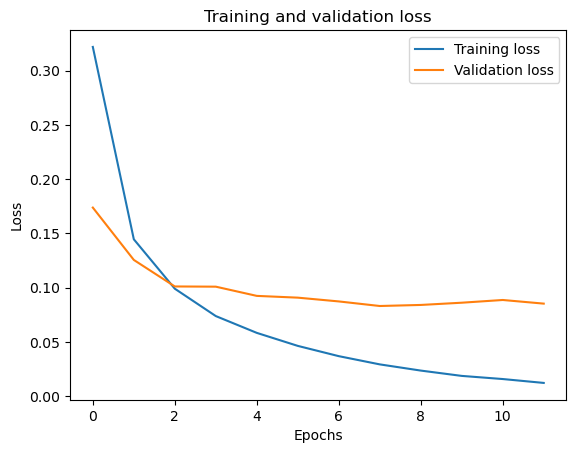

In [8]:
# Plot the training loss
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

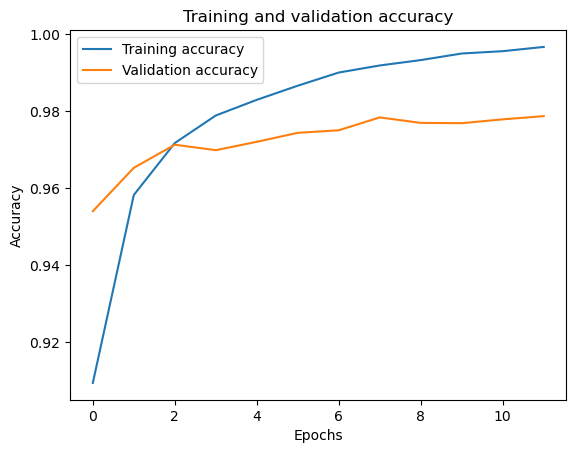

In [9]:
# Plot the training accuracy
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Question 5: Describe how this training history differs from the previous model, for the training and validation sets. Explain what this tells us about the generalisation of the model (8 points).

The first graph plots the training and validation loss values over the epochs. The loss is a measure of how well the model is able to fit the training data and minimize the difference between the predicted output and the actual target values. The training loss is calculated on the training data, while the validation loss is calculated on the validation data.

In the first graph, training and validation loss decrease over time, with the validation loss remaining relatively constant after the second epoch. The fact that the validation loss remains relatively constant after the second epoch means that the model is not overfitting the training data, and it is generalizing well to new, unseen data. The meeting of the training and validation loss lines at the second epoch indicates that the model has achieved a balance between underfitting and overfitting the training data, and it is neither too simple nor too complex. The decrease in the training loss line beyond the second epoch indicates that the model continues to learn from the training data and improve its performance.

The second graph plots the training and validation accuracy values over the epochs. The accuracy is a measure of how many predictions the model makes correctly. The training accuracy is calculated on the training data, while the validation accuracy is calculated on the validation data.

In this case, both the training accuracy and validation accuracy increase over time, which means that the model is improving its ability to correctly classify the samples. The validation accuracy line remains relatively constant after the second epoch, which suggests that the model is not overfitting to the training data, as the accuracy on the validation set is not significantly improving. The training and validation accuracy lines meet at the second epoch, which means that the performance of the model on the training data and validation data is similar at this point.

### Deep convolutional networks

Our first two models used fully-connected networks for number recognition. They ran quickly, largely because of their very simple structure. They learned the relationships between our pixels and the numbers they represent fairly well. However, they had a limited ability to generalise to new data that they were not trained on. 

In deep convolutional networks, each convolutional filter samples from the limited space in the previous layer’s feature map. To use the whole image to determine outputs, they need more layers to allow more spatial integration. They also need multiple feature maps at each layer to capture the multiple meaningful spatial relationships that are possible. All of this greatly increases computational load.

Reshape x_train to size 60000, 28, 28, 1. Reshape x_test to size 10000, 28, 28, 1. Rescale both results to values between zero and one as before. y_train and y_test are categorical units, as before.

In [9]:
# Reshape x_train to size 60000, 28, 28, 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Reshape x_test to size 10000, 28, 28, 1
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Rescale both x_train and x_test to values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

# Rescale labels y_train and y_test to values between 0 and 1
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Now we will define a convolutional learning model with 2 convolutional layers that result from 32 convolutional filters into the first layer and 64 filters into the second. We will use 3x3 pixel filters to sample from the image to the first layer, and the same to sample from the first layer to the second. We will use rectified activation functions for both convolutional layers. We will use pooling to downsample the second convolutional layer to half its size in both spatial dimensions (so one quarter of the pixels). We will flatten the resulting feature map to one dimension, then use one fullyconnected layer to link our network to the labels.

In [10]:
# Creates an empty sequential model.
model = keras.Sequential()

# Adds a 2D convolutional layer with 32 filters, each with a 3x3 kernel size and ReLU activation function. 
# A 2D convolutional layer means that each filter is a small 2D matrix.
# The input shape is (28, 28, 1), which corresponds to the dimensions of the MNIST images.
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))

# Adds another 2D convolutional layer with 64 filters and 3x3 kernel size with ReLU activation function.
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# Adds a max pooling layer with a pool size of (2, 2). This reduces the spatial dimensions of the previous layer's output by a factor of 2.
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flattens the output from the previous layer into a 1D vector.
model.add(keras.layers.Flatten())

# Adds a fully connected (dense) layer with 128 neurons and ReLU activation function.
model.add(keras.layers.Dense(128, activation="relu"))

# Adds another fully connected layer with 10 neurons, corresponding to the number of classes in the MNIST dataset, 
# and a softmax activation function. This layer outputs the probability distribution over the classes.
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')
# Fit the model using 6 epochs. Expect that model fitting will take far longer than the previous ones.
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6


ValueError: in user code:

    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/hakim/opt/anaconda3/envs/INFOMHNA/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (128, 10, 10, 10) and (128, 10) are incompatible


Plot the training history as before.

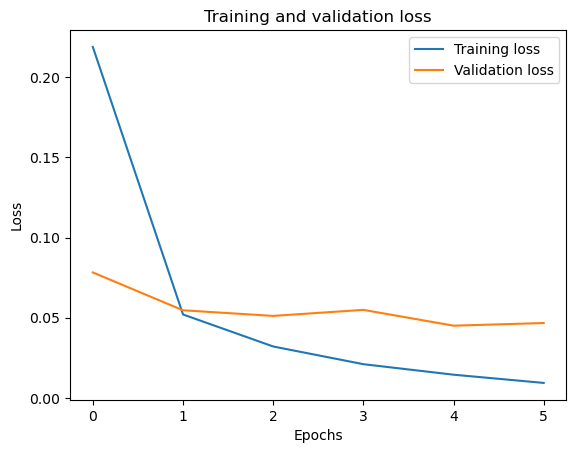

In [7]:
# Plot the training loss
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

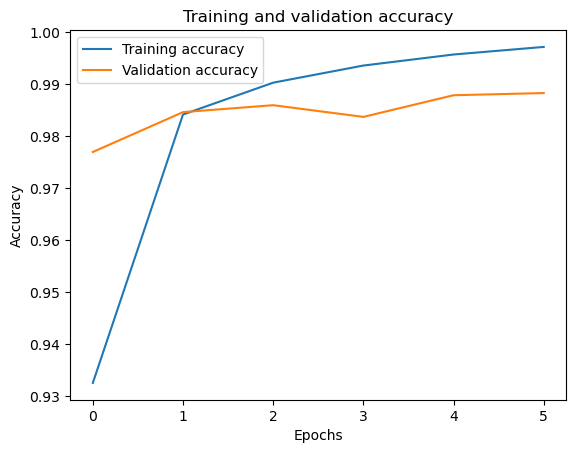

In [8]:
# Plot the training accuracy
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Quantify the model’s accuracy and loss as before.

In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 692us/step - loss: 0.2818 - accuracy: 0.9237
Test Loss: 0.2817889153957367
Test Accuracy: 0.9236999750137329


#### Question 6: Explain whether you think this is sufficient for the uses of automatic hand-written digit classification you listed in Question 1, and why (5 points).

#### Question 7: ‘Dropout’ is a method used in deep network training to prevent overfitting of training data and focus on aspects of the learning model that will generalise to new data. Research and describe the principles of overfitting and how dropout can reduce this (7 points).

Dropout is a regularization technique used to address overfitting in deep networks. The basic idea behind dropout is to randomly drop out units, or neurons, during the training process. This means that during each forward pass, some neurons are temporarily shut off and their outputs are ignored. This forces the network to rely on the remaining neurons and encourages diversity in the activations. At each forward pass, different neurons are dropped out, which makes the network more robust and prevents it from relying too heavily on any one neuron.

Dropout reduces overfitting by reducing the co-adaptation of neurons and preventing complex models from overfitting to the training data. By randomly dropping out neurons, the network is encouraged to learn multiple independent representations of the data and is less likely to become overly specialized in a specific subset of the data. This makes the model more general and better suited for making predictions on new data.

In [25]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')
# Fit the model using 6 epochs. Expect that model fitting will take far longer than the previous ones.
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 35s 92ms/step - loss: 0.2541 - accuracy: 0.9216 - val_loss: 0.0706 - val_accuracy: 0.9777
Epoch 2/6
375/375 [==============================] - 36s 96ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 3/6
375/375 [==============================] - 42s 111ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0480 - val_accuracy: 0.9864
Epoch 4/6
375/375 [==============================] - 40s 107ms/step - loss: 0.0459 - accuracy: 0.9852 - val_loss: 0.0416 - val_accuracy: 0.9882
Epoch 5/6
375/375 [==============================] - 40s 107ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0393 - val_accuracy: 0.9885
Epoch 6/6
375/375 [==============================] - 40s 107ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0355 - val_accuracy: 0.9897


#### Question 8: In comparison to the previous (convolutional) model: a) How does the time taken for each training epoch differ? b) How does the training history differ for both the training and validation sets? c) How well does the resulting model generalise? (6 points)

# Exercise two: Identifying objects from images

First, download and load the data set using:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Prepare the test and training images by dividing their values by 255, storing the result in variables x_train and x_test. The shapes of the image matrices are already correct for input into Keras. Convert the training and test labels to categorical variables, as before with the handwritten digits, storing the result in variables y_train and y_test.

In [ ]:
# Normalize the pixel values from [0, 255] to [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# Convert the labels to one-hot encoded form
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Define the model using the convolutional network with dropout (from Question 8) as a template.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape = (32, 32, 3), padding = “same”))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

# Additional conv, conv, pool, and dropout layers
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding = “same”))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6), metrics='accuracy')

# Fit the model using 6 epochs. Expect that model fitting will take far longer than the previous ones.
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle = True)

#### Question 9: In comparison to the convolutional model for digit recognition (13 points total): 

#### Question 9.1: How long does it take to run each training epoch? (1 point)

#### Question 9.2: Give at least factors that may contribute to this difference, explaining each (4points)

#### Question 9.3: Describe how the training history differs and why.(6 points)

#### Question 9.4: The simpler, non-convolutional models from Exercise 1 (Questions2-5) would perform very poorly on this object recognition task, while they do fairly well on number recognition. What differences between these tasks could underlie this difference in performance? (2 points)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
img=np.random.rand(1,1,10,10)
ker=np.random.rand(1,1,3,3)
img

what is the difference between these images:
first_image=np.random.rand(1,1,10,10)
second_image=np.random.rand(1,10,10)

array([[[[0.38190993, 0.08557022, 0.47784648, 0.02097297, 0.4409379 ,
          0.54593885, 0.06180582, 0.88835428, 0.61066217, 0.70384623],
         [0.42409093, 0.96862716, 0.84192445, 0.3493929 , 0.12610799,
          0.6460223 , 0.66535769, 0.90784425, 0.58869806, 0.18845247],
         [0.50949719, 0.7911773 , 0.10453303, 0.38485405, 0.07336655,
          0.92454643, 0.2398615 , 0.1316674 , 0.3204776 , 0.13587624],
         [0.31966777, 0.46605818, 0.39948324, 0.35718936, 0.59869476,
          0.66729409, 0.362822  , 0.05736768, 0.89618371, 0.80472628],
         [0.66866009, 0.94946378, 0.54746314, 0.74072932, 0.73716397,
          0.20883495, 0.63865688, 0.20588426, 0.99926694, 0.31763359],
         [0.58065063, 0.78305178, 0.3721883 , 0.62327523, 0.56106159,
          0.69415089, 0.25266043, 0.43856069, 0.10035165, 0.01331091],
         [0.91896768, 0.25544585, 0.57329186, 0.7353803 , 0.24693821,
          0.78846324, 0.9289096 , 0.1028398 , 0.90941538, 0.18134692],
         [0.8

In [23]:
i0=np.repeat(np.arange(5), 5)
i0

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

# Exercise three: Low-level functions

#### Question 10: Write a simple function that achieves the convolution operation efficiently for two-dimensional and three-dimensional inputs. This should allow you to input a set of convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image) as inputs. The input layer should have a third dimension, representing a stack of feature maps, and each filter should have a third dimension of corresponding size. The function should output a number of two-dimensional feature maps corresponding to the number of input filters, though these can be stacked into a third dimensional like the input layer.

#### In your answer, please give the code you have written (yourselves). Also include an example input image (for example from the mnist set) and the same image convolved with two 3x3 filters, one detecting horizontal edges and the other detecting vertical edges (5 points).

In [49]:

# |------------------------------------------------------------ DEFINE CONVOLUTION FUNCTION ------------------------------------------------------------|


# Define a function that will perform a convolution operation on an input layer and a set of filters.

def convolve(input_layer, filters):
    
    # Get shape and batch size of input layer.
    input_shape = input_layer.shape
    batch_size = input_shape[0]
    # Get the shape of the filter set. 
    filter_shape = filters.shape
    
    # Check if the input layer has two or three dimensions
    if len(input_shape) == 3:
        input_rows, input_cols = input_shape[1], input_shape[2]
    elif len(input_shape) == 4:
        input_rows, input_cols, input_channels = input_shape[1:]
    
    
    if len(filter_shape) == 4:
        filter_rows, filter_cols, filter_channels, num_filters = filter_shape
    elif len(filter_shape) == 5:
        filter_rows, filter_cols, filter_channels, num_filters = filter_shape[1:]
    
    # Calculate output dimensions based on input and filter set
    output_rows = input_rows - filter_rows + 1
    output_cols = input_cols - filter_cols + 1
    
    # Initialize output layer
    output_layer = np.zeros(input_shape[:1] + (output_rows, output_cols) + filter_shape[3:])
    
    # Perform convolution
    if len(input_shape) == 3:
        for r in range(output_rows):
            for c in range(output_cols):
                output_layer[:, r, c, :] = np.sum(
                    input_layer[:, r:r+filter_rows, c:c+filter_cols] *
                    filters, axis=(1, 2))
    elif len(input_shape) == 4:
        for r in range(output_rows):
            for c in range(output_cols):
                output_layer[:, r, c, :] = np.sum(
                    input_layer[:, r:r+filter_rows, c:c+filter_cols, np.newaxis] *
                    filters[np.newaxis, :, :, :, :], axis=(1, 2, 3))
    
    return output_layer

# |------------------------------------------------------------ EXAMPLE CASE ------------------------------------------------------------|
 

# Load image
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 # Add an channel dimension adn scale pixel values to [0, 1] for better performance. 
input_layer = x_train[0:1, :, :, np.newaxis] / 255.0 

# Define the horizontal filter and add two new dimensions 
horizontal_edge_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])[:, :, np.newaxis, np.newaxis] 
# Define the vertical filter and add two new dimensions 
vertical_edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])[:, :, np.newaxis, np.newaxis]
# Concatenate the above filters into one filter set. 
filters = np.concatenate([horizontal_edge_filter, vertical_edge_filter], axis=3)

# Perform convolution
output_layer = convolve(input_layer, filters)

# Visualize results
import matplotlib.pyplot as plt
plt.subplot(131)
plt.imshow(input_layer[0, :, :, 0], cmap='gray')
plt.title('Input layer')
plt.axis('off')
plt.subplot(132)
plt.imshow(output_layer[0, :, :, 0], cmap='gray')
plt.title('Horizontal edge filter')
plt.axis('off')
plt.subplot(133)
plt.imshow(output_layer[0, :, :, 1], cmap='gray')
plt.title('Vertical edge filter')
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (1315930894.py, line 1)

In [2]:
import numpy as np

def convolve(image, filters):
    """
    Performs a convolution operation on an input layer using a set of filters.
    
    Arguments:
    image -- 3D numpy array with shape (height, width, channels)
    filters -- 4D numpy array with shape (filter_height, filter_width, channels, num_filters)
    
    Returns:
    output -- 3D numpy array with shape (output_height, output_width, num_filters)
    """
    # Get input dimensions
    height, width, channels = image.shape
    
    # Get filter dimensions
    filter_height, filter_width, _, num_filters = filters.shape
    
    # Compute output dimensions
    output_height = height - filter_height + 1
    output_width = width - filter_width + 1
    
    # Reshape input image to a 2D matrix
    image_matrix = np.zeros((height * width, channels))
    for c in range(channels):
        image_matrix[:, c] = image[:, :, c].flatten()
    
    # Reshape filters to a 2D matrix
    filter_matrix = filters.reshape(filter_height * filter_width * channels, num_filters)
    
    # Compute output as a matrix multiplication
    output_matrix = np.dot(image_matrix, filter_matrix)
    
    # Reshape output to a 3D tensor
    output = output_matrix.reshape(output_height, output_width, num_filters)
    
    return output

import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.

# Define horizontal and vertical filters
horizontal_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
vertical_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

filters = np.stack([horizontal_filter, vertical_filter], axis=-1)
filters = np.expand_dims(filters, axis=-1)

# Apply convolution to first image in MNIST dataset
output = convolve(x_train[0], filters)

# Plot input image and output feature maps
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].imshow(x_train[0], cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(output[:, :, 0], cmap='gray')
ax[1].set_title('Horizontal Edges')

ax[2].imshow(output[:, :, 1], cmap='gray')
ax[2].set_title('Vertical Edges')

plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

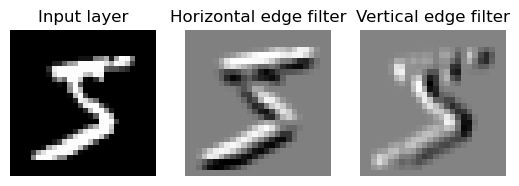

In [18]:
import numpy as np

def convolve2d(input_layer, filters, stride=1):
    # Get input layer and filter dimensions
    batch_size, input_rows, input_cols, input_channels = input_layer.shape
    filter_rows, filter_cols, filter_channels, num_filters = filters.shape
    
    # Calculate output dimensions
    output_rows = int((input_rows - filter_rows) / stride) + 1
    output_cols = int((input_cols - filter_cols) / stride) + 1
    
    # Initialize output layer
    output_layer = np.zeros((batch_size, output_rows, output_cols, num_filters))
    
    # Perform convolution
    for r in range(output_rows):
        for c in range(output_cols):
            output_layer[:, r, c, :] = np.sum(
                input_layer[:, r*stride:r*stride+filter_rows, c*stride:c*stride+filter_cols, :, np.newaxis] *
                filters[np.newaxis, :, :, :, :], axis=(1, 2, 3))
    
    return output_layer



# Load example image
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_layer = x_train[0:1, :, :, np.newaxis] / 255.0  # Scale pixel values to [0, 1]

# Define filters
horizontal_edge_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])[:, :, np.newaxis, np.newaxis]
vertical_edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])[:, :, np.newaxis, np.newaxis]
filters = np.concatenate([horizontal_edge_filter, vertical_edge_filter], axis=3)

# Perform convolution
output_layer = convolve2d(input_layer, filters)

# Visualize results
import matplotlib.pyplot as plt
plt.subplot(131)
plt.imshow(input_layer[0, :, :, 0], cmap='gray')
plt.title('Input layer')
plt.axis('off')
plt.subplot(132)
plt.imshow(output_layer[0, :, :, 0], cmap='gray')
plt.title('Horizontal edge filter')
plt.axis('off')
plt.subplot(133)
plt.imshow(output_layer[0, :, :, 1], cmap='gray')
plt.title('Vertical edge filter')
plt.axis('off')
plt.show()

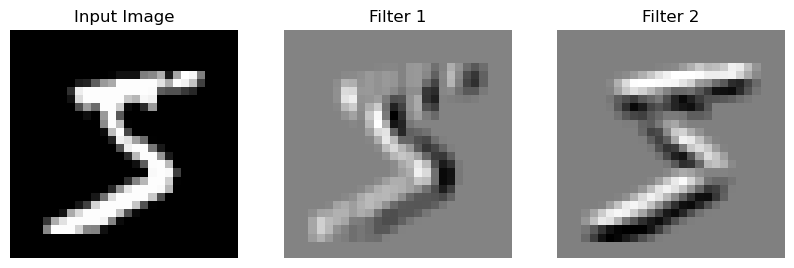

In [46]:
# Define a convolution function with four input parameters:
#    img: the input image (numpy array)
#    filters: a set of filters (numpy array)
#    b: bias term for each filter (scalar)
#    pad: the number of padding pixels (default=1)
#    stride: the stride length for the convolution operation (default=1)

def convolution(image, kernels, b, pad=1, stride=1):
    
    # unpacks the dimensions of the input image
    img_b, img_d, img_h, img_w = image.shape 
    # unpacks the dimensions of the kernels (filters)
    ker_b, ker_d, ker_h, ker_w = kernels.shape
    # Pad the input image with zeros to retain spatial dimensions and edge information during the convolutional operation
    pad_img = np.pad(image, ((0,0),(0,0),(1,1),(1,1)), mode='constant')

    # Calculate the height and width of the output feature maps. 
    # The formula used here gives the number of times the filter can be convolved with the input image. 
    out_h = int((img_h - ker_h) + (2 * pad) / stride) + 1  
    out_w = int((img_w - ker_w) + (2 * pad) / stride) + 1  

#Create the sliding window for convolution. The variables i, j, and k represent the spatial coordinates and the channel number, respectively. 
#The select_img variable selects the corresponding pixels for each position of the sliding window. The select_filters variable reshapes the 
#filters into a 2D array for matrix multiplication with select_img. The result is then reshaped into a 4D tensor to match the dimensions of 
#the output feature maps.
    
    i0 = np.repeat(np.arange(ker_h), ker_h)
    i1 = np.repeat(np.arange(img_h), img_h)
    j0 = np.tile(np.arange(ker_w), ker_h)
    j1 = np.tile(np.arange(img_h), img_w)
    i = i0.reshape(-1,1) + i1.reshape(1,-1)
    j = j0.reshape(-1,1) + j1.reshape(1,-1)
    k = np.repeat(np.arange(img_d), ker_h * ker_w).reshape(-1,1)

    
    # Select the appropriate pixels for each position of the sliding window using i, j, and k  
    # The squeeze() function is used to remove any dimensions of size 1 from the resulting array.
    select_img = pad_img[:,:,i,j].squeeze() 
    
    # Reshape the set of filters into a 2D array for matrix multiplication with the image
    select_filters = filters.reshape(ker_b, -1)
    # Matrix multiplication
    convolve = select_filters @ select_img
    # Reshaped the output into a 4D  to match the dimensions of the output feature maps.
    convolve = convolve.reshape(ker_b, 1, out_h, out_w)

    return convolve

# Example usage

# Load a sample image from the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img = x_train[0]

img = img.reshape(1, 1, img.shape[0], img.shape[1])

# Define two filters for detecting horizontal and vertical edges
filter1 = np.array([[[-1,0,1], [-1,0,1], [-1,0,1]]])
filter2 = np.array([[[-1,-1,-1], [0,0,0], [1,1,1]]])
filters = np.concatenate((filter1, filter2), axis=0)
filters = np.expand_dims(filters, axis=1)  # add a new dimension for each filter

# Convolve the filters with the input image
output_layer = convolution(img, filters, b=0, pad=1, stride=1)

# Plot the input image and the convolved feature maps
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img[0, 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_layer[0, 0], cmap='gray')
plt.title('Filter 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_layer[1, 0], cmap='gray')
plt.title('Filter 2')
plt.axis('off')

plt.show()

Question 11: Write a simple function that achieves rectified linear (relu) activation over a whole feature map, with a threshold at zero. In your answer, give the code you have written and one of the previous convolved images after this operation. (2 points)

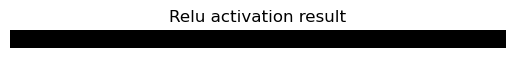

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[Relu activation result](relu_result.png)'


In [48]:
def relu_activation(input_layer, threshold=0):
    return np.maximum(input_layer, threshold)

# Perform relu activation on one of the convolved images
relu_output = relu_activation(output_layer[0, :, :, 0], threshold=0)

# Visualize the result
plt.imshow(relu_output, cmap='gray')
plt.title('Relu activation result')
plt.axis('off')
plt.show()


![Relu activation result](relu_result.png)

In [37]:
output_layer[0, :, :, 0].shape

(26, 26)

In [33]:
relu_output.shape

(26, 26)

Question 12: Write a simple function that achieves max pooling. This should allow you to specify the spatial extent of the pooling, with the size of the output feature map changing accordingly. In your answer, give the code you have written and the image from the previous question after pooling with a 2x2 kernal. (3 points)

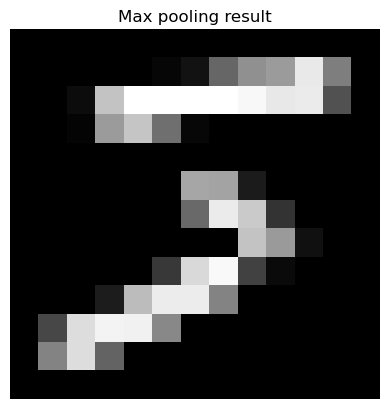

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[Max pooling result](pooling_result.png)'


In [48]:
def max_pooling(input_layer, pool_size=2):
    input_shape = input_layer.shape
    batch_size = input_shape[0]
    input_rows, input_cols = input_shape[1], input_shape[2]
    
    output_rows = input_rows // pool_size
    output_cols = input_cols // pool_size
    
    output_layer = np.zeros((batch_size, output_rows, output_cols))
    
    for r in range(output_rows):
        for c in range(output_cols):
            output_layer[:, r, c] = np.max(input_layer[:, r*pool_size:(r+1)*pool_size, c*pool_size:(c+1)*pool_size], axis=(1, 2))
    
    return output_layer


# Perform max pooling on the relu output from the previous question
input_layer = relu_output[np.newaxis, :, :]
pooled_output = max_pooling(input_layer, pool_size=2)

# Visualize the result
pooled_output = np.squeeze(pooled_output)
plt.imshow(pooled_output, cmap='gray')
plt.title('Max pooling result')
plt.axis('off')
plt.show()


![Max pooling result](pooling_result.png)

In [43]:
input_shape = input_layer.shape
input_shape[2] 

26

Question 13: Write a simple function that achieves normalisation within each feature map, modifying the feature map so that its mean value is zero and its standard deviation is one. In your answer, give the code you have written. (2 points)

In [ ]:
def normalize_feature_map(feature_map):
    mean = np.mean(feature_map)
    std = np.std(feature_map)
    return (feature_map - mean) / std

pooled_output = max_pooling(input_layer, pool_size=2)
normalized_output = normalize_feature_map(pooled_output)


Question 14: Write a function that produces a fully-connected layer. This should allow you to specify the number of output nodes, and link each of these to every node in an input stack of feature maps. You should probably begin by flattening this stack of feature maps into a 1-dimensional matrix. In your answer, give the code you have written. (5 points)

In [ ]:
def fully_connected_layer(input_stack, output_nodes):
    input_stack_flattened = input_stack.reshape(input_stack.shape[0], -1)
    weights = np.random.randn(input_stack_flattened.shape[1], output_nodes) / np.sqrt(input_stack_flattened.shape[1])
    biases = np.zeros((1, output_nodes))
    output = np.dot(input_stack_flattened, weights) + biases
    return output

Question 15: Write a function that converts the activation of a 1-dimensional matrix (such as the output of a fully-connected layer) into a set of probabilities that each matrix element is the most likely classification. This should include the algorithmic expression of a softmax (normalised exponential) function. In your answer, give the code you have written. (2 points)

In [ ]:
def softmax(input_matrix):
    exp_input = np.exp(input_matrix)
    sum_exp_input = np.sum(exp_input, axis=1, keepdims=True)
    output = exp_input / sum_exp_input
    return output


# Exercise 4: Exam study